<a href="https://colab.research.google.com/github/ian-byrne/MADSmilestone2/blob/main/Supervised_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Clock Drawing Image Classification with Convolutional Neural Networks
### Stacey Beck and Ian Byrne

- Split data into sets of Training (x = image arrays ; y = labels), Test (~10% image arrays), and Validation (~10% of the Training). 
- Build CNN using Pytorch for Training and Test:
  - Specify CUDA
  - 2D convolution, Normalization (for faster training), Non-linear Activation Function (ex. RELU), Max Pooling (downsampling to reduce learned parameters).
  - Define Layers 
  - Build Forward and backward pass
  - Define optimizer (due to many - deep - nodes) ex) ADAM
  - Calculate Loss (BCE)
  - Calculate Accuracy, Precision, Recall (Confusion Matrix)
  - Plot ROC and print Confusion Matrix



In [2]:
# Clone the entire repo.
!git clone -l -s https://github.com/ian-byrne/MADSmilestone2.git

# Change directory into cloned repo
%cd MADSmilestone2

# List repo contents
#!ls

Cloning into 'MADSmilestone2'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 211 (delta 101), reused 83 (delta 27), pack-reused 0
Receiving objects: 100% (211/211), 817.47 KiB | 5.41 MiB/s, done.
Resolving deltas: 100% (101/101), done.
/content/MADSmilestone2


In [ ]:
#!rm -rf /content/MADSmilestone2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
from PIL import Image
import ast
import Images

In [4]:
# Read round, id, label dictionary file

r_id_labl = open("Labeling/roundIdLabelDict.txt", "r")
#print(r_id_labl.readline())
contents = r_id_labl.read()
dictionary = ast.literal_eval(contents)
r_id_labl.close()

In [ ]:
dictionary

In [ ]:
# create label array
label_arr = []
for id, val in dictionary.items():
  for num in val:
    label_arr.append(num[1])


In [21]:
def get_images_test(id_rounds):
    counter = 0
    store_images = []
    #image_data = []
    label_arr = []

    for id, array in id_rounds.items():
        for value in array:
            if counter < 100:
                url = 'https://clockimages.s3.us-west-1.amazonaws.com/NHATS_R' + str(
                    id) + '_ClockDrawings/' + value[0] + '.tif'

                # Open files and convert to work with Image in PIL
                response = requests.get(url)  # , stream = True)
                f = io.BytesIO(response.content)
                im_pil = Image.open(f)

                # Resize pil image files
                resized = im_pil.resize((im_pil.width//9,im_pil.height//9))
                imarray1 = np.array(resized)

                #imarray = np.logical_not(np.array(im)).astype(int) #bool to int, inverts values
                #image_data.append(get_coordinates(imarray1))  # , imarray1.shape[0], imarray1.shape[1]))

                #Store the np array images into a list
                store_images.append(imarray1)

                print("round: ", id)

                #Visualize the resized images
                viz_image(imarray1, resized, value[0], value[1])

                counter += 1
                
                # Store corresponding labels
                label_arr.append(value[1])
                

    return store_images, label_arr




def viz_image(image, resized, value0, value1):
  print("shape: ", image.shape)
  print("spid: ", value0)
  print("label: ", value1)

  # revert
  im2 = Image.fromarray(np.array(resized))
  plt.imshow(im2)
  plt.show()

round:  1
shape:  (368, 284)
spid:  10000003
label:  2


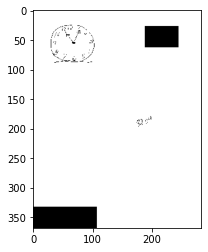

round:  1
shape:  (368, 284)
spid:  10000004
label:  2


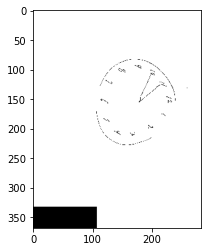

round:  1
shape:  (368, 284)
spid:  10000005
label:  2


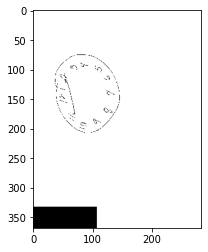

round:  1
shape:  (368, 284)
spid:  10000006
label:  2


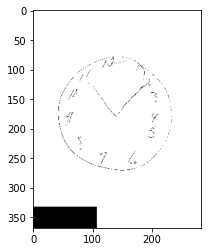

round:  1
shape:  (368, 284)
spid:  10000008
label:  2


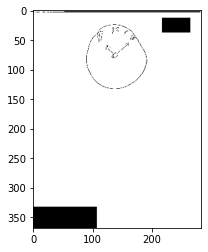

round:  1
shape:  (368, 284)
spid:  10000010
label:  1


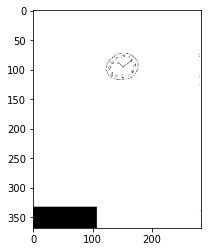

round:  1
shape:  (368, 284)
spid:  10000016
label:  2


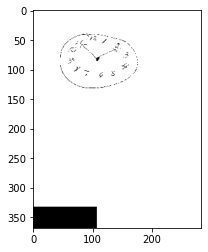

round:  1
shape:  (368, 284)
spid:  10000017
label:  2


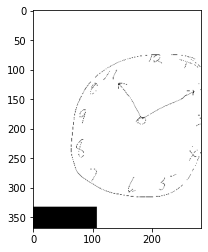

round:  1
shape:  (368, 284)
spid:  10000019
label:  2


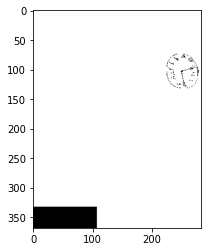

round:  1
shape:  (368, 284)
spid:  10000020
label:  2


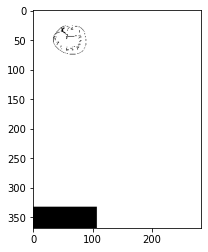

round:  1
shape:  (368, 284)
spid:  10000021
label:  2


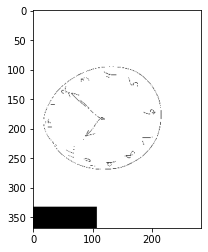

round:  1
shape:  (368, 284)
spid:  10000022
label:  2


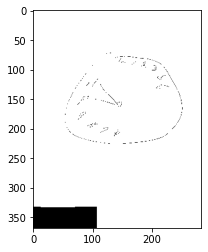

round:  1
shape:  (368, 284)
spid:  10000024
label:  2


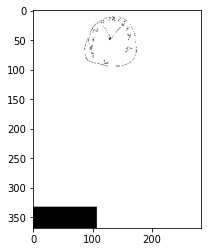

round:  1
shape:  (368, 284)
spid:  10000027
label:  2


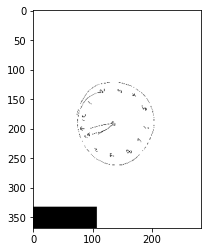

round:  1
shape:  (368, 284)
spid:  10000029
label:  2


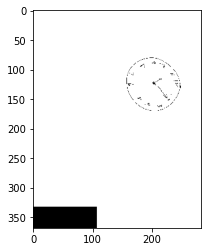

round:  1
shape:  (368, 284)
spid:  10000030
label:  2


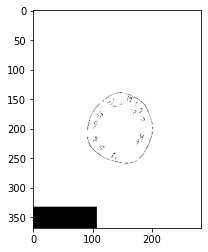

round:  1
shape:  (368, 284)
spid:  10000032
label:  2


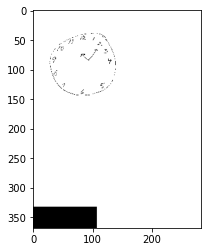

round:  1
shape:  (368, 284)
spid:  10000033
label:  2


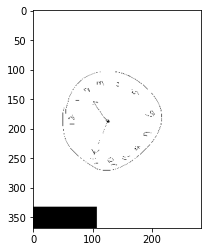

round:  1
shape:  (368, 284)
spid:  10000034
label:  2


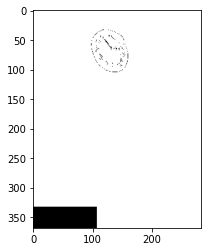

round:  1
shape:  (368, 284)
spid:  10000036
label:  2


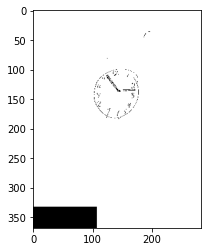

round:  1
shape:  (368, 284)
spid:  10000037
label:  2


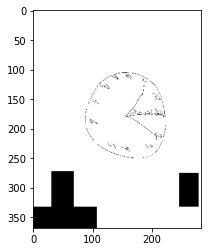

round:  1
shape:  (368, 284)
spid:  10000038
label:  2


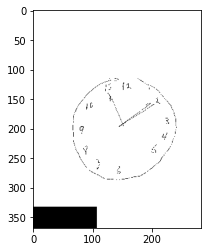

round:  1
shape:  (368, 284)
spid:  10000040
label:  2


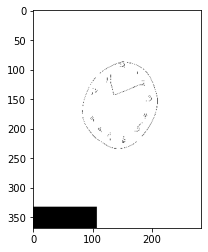

round:  1
shape:  (368, 284)
spid:  10000041
label:  2


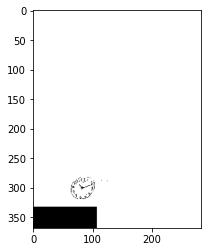

round:  1
shape:  (368, 284)
spid:  10000043
label:  2


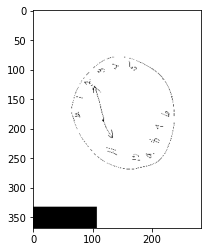

round:  1
shape:  (368, 284)
spid:  10000044
label:  2


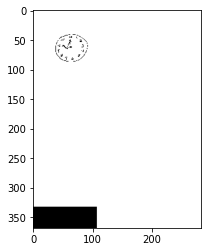

round:  1
shape:  (368, 284)
spid:  10000045
label:  2


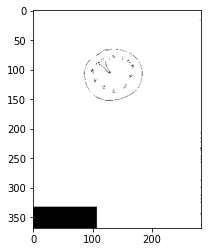

round:  1
shape:  (368, 284)
spid:  10000047
label:  0


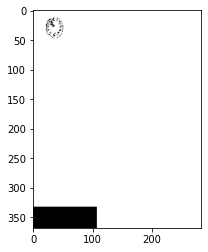

round:  1
shape:  (368, 284)
spid:  10000048
label:  2


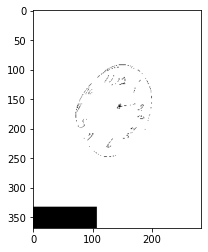

round:  1
shape:  (368, 284)
spid:  10000049
label:  2


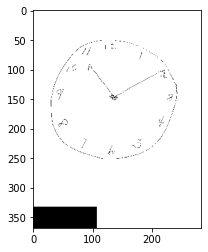

round:  1
shape:  (368, 284)
spid:  10000050
label:  2


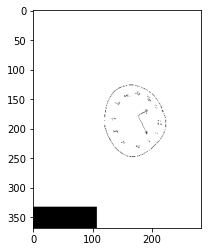

round:  1
shape:  (368, 284)
spid:  10000051
label:  1


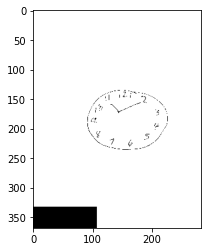

round:  1
shape:  (368, 284)
spid:  10000052
label:  2


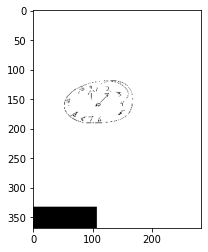

round:  1
shape:  (368, 284)
spid:  10000053
label:  2


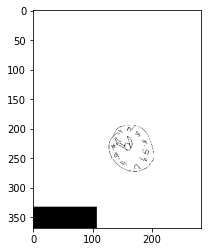

round:  1
shape:  (368, 284)
spid:  10000055
label:  2


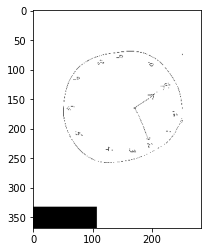

round:  1
shape:  (368, 284)
spid:  10000056
label:  2


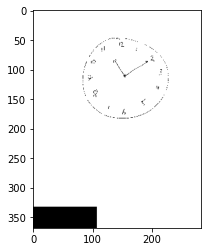

round:  1
shape:  (368, 284)
spid:  10000057
label:  2


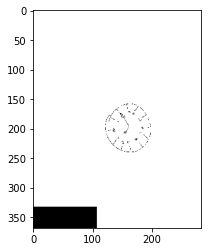

round:  1
shape:  (368, 284)
spid:  10000060
label:  2


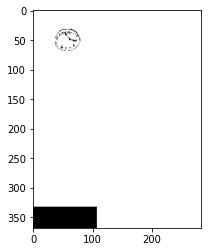

round:  1
shape:  (368, 284)
spid:  10000063
label:  2


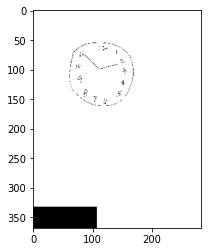

round:  1
shape:  (368, 284)
spid:  10000064
label:  2


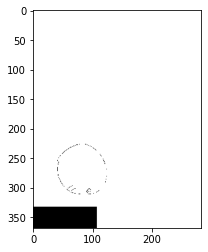

round:  1
shape:  (368, 284)
spid:  10000068
label:  2


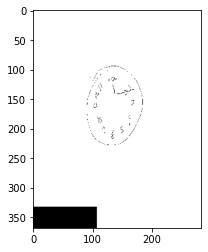

round:  1
shape:  (368, 284)
spid:  10000070
label:  2


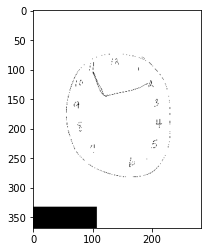

round:  1
shape:  (368, 284)
spid:  10000072
label:  2


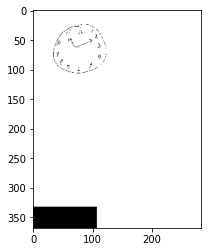

round:  1
shape:  (368, 284)
spid:  10000074
label:  2


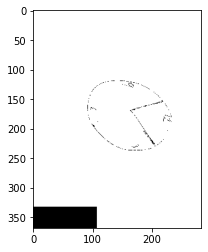

round:  1
shape:  (368, 284)
spid:  10000076
label:  2


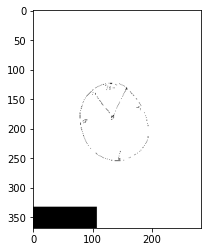

round:  1
shape:  (368, 284)
spid:  10000078
label:  2


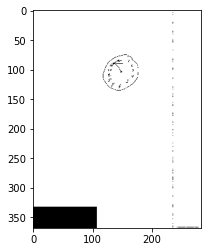

round:  1
shape:  (368, 284)
spid:  10000080
label:  2


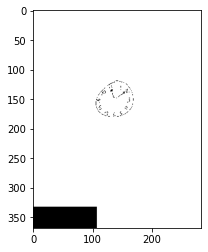

round:  1
shape:  (368, 284)
spid:  10000081
label:  2


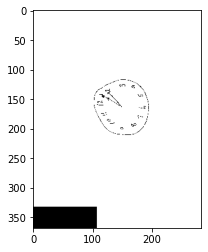

round:  1
shape:  (368, 284)
spid:  10000083
label:  2


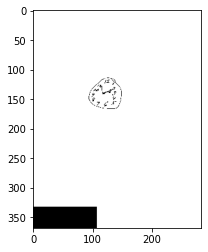

round:  1
shape:  (368, 284)
spid:  10000084
label:  2


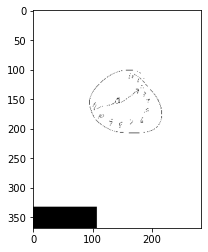

round:  1
shape:  (368, 284)
spid:  10000085
label:  2


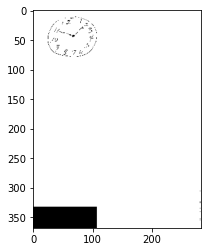

round:  1
shape:  (368, 284)
spid:  10000087
label:  2


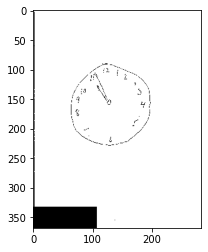

round:  1
shape:  (368, 284)
spid:  10000088
label:  2


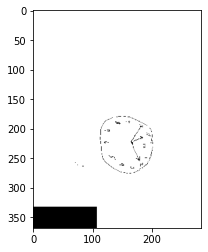

round:  1
shape:  (368, 284)
spid:  10000090
label:  2


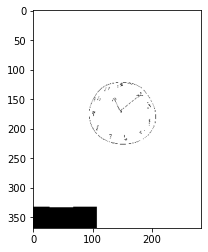

round:  1
shape:  (368, 284)
spid:  10000092
label:  2


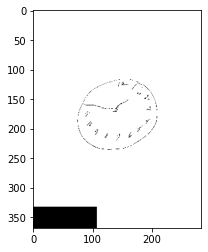

round:  1
shape:  (368, 284)
spid:  10000094
label:  2


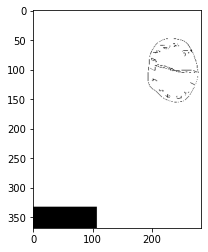

round:  1
shape:  (368, 284)
spid:  10000095
label:  2


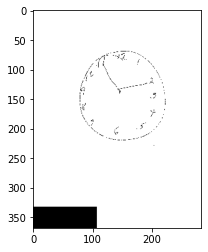

round:  1
shape:  (368, 284)
spid:  10000096
label:  2


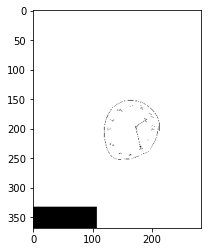

round:  1
shape:  (368, 284)
spid:  10000097
label:  2


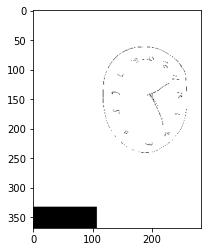

round:  1
shape:  (368, 284)
spid:  10000098
label:  2


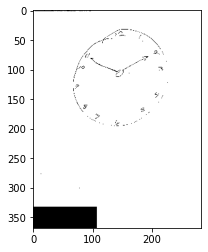

round:  1
shape:  (368, 284)
spid:  10000100
label:  2


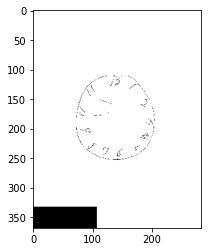

round:  1
shape:  (368, 284)
spid:  10000102
label:  2


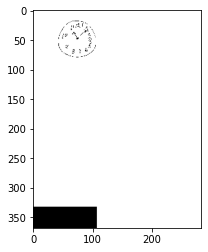

round:  1
shape:  (368, 284)
spid:  10000104
label:  2


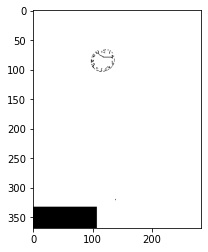

round:  1
shape:  (368, 284)
spid:  10000106
label:  2


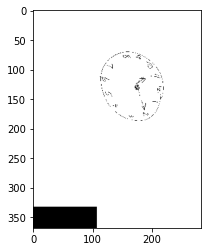

round:  1
shape:  (368, 284)
spid:  10000107
label:  2


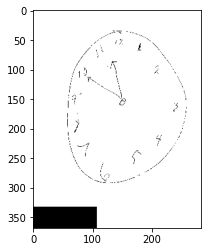

round:  1
shape:  (368, 284)
spid:  10000110
label:  2


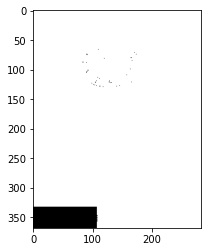

round:  1
shape:  (368, 284)
spid:  10000112
label:  2


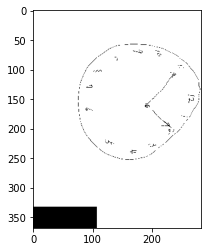

round:  1
shape:  (368, 284)
spid:  10000113
label:  2


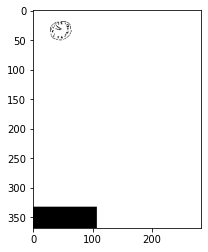

round:  1
shape:  (368, 284)
spid:  10000115
label:  1


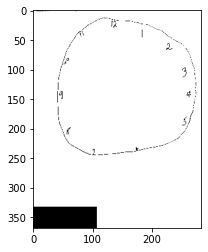

round:  1
shape:  (368, 284)
spid:  10000117
label:  2


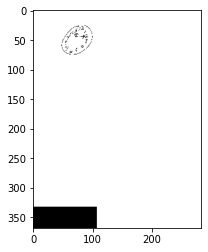

round:  1
shape:  (368, 284)
spid:  10000118
label:  2


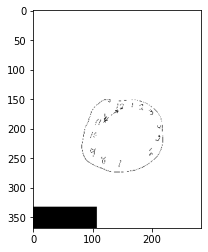

round:  1
shape:  (368, 284)
spid:  10000119
label:  2


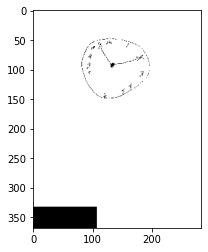

round:  1
shape:  (368, 284)
spid:  10000120
label:  2


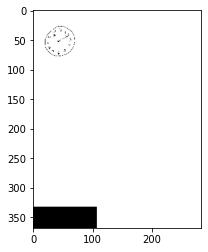

round:  1
shape:  (368, 284)
spid:  10000121
label:  2


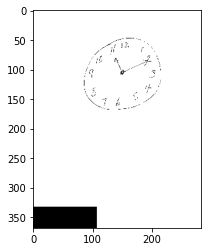

round:  1
shape:  (368, 284)
spid:  10000125
label:  2


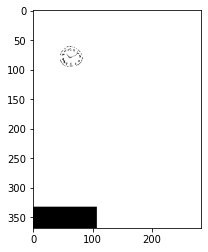

round:  1
shape:  (368, 284)
spid:  10000127
label:  2


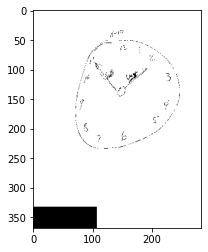

round:  1
shape:  (368, 284)
spid:  10000128
label:  2


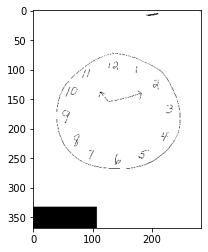

round:  1
shape:  (368, 284)
spid:  10000130
label:  0


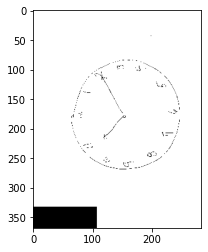

round:  1
shape:  (368, 284)
spid:  10000133
label:  2


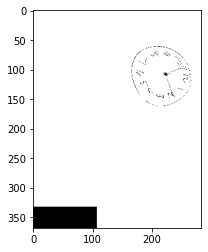

round:  1
shape:  (368, 284)
spid:  10000134
label:  2


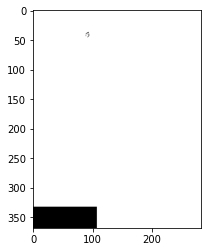

round:  1
shape:  (368, 284)
spid:  10000136
label:  2


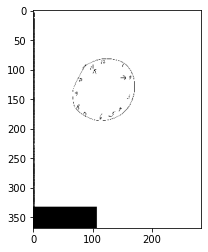

round:  1
shape:  (368, 284)
spid:  10000137
label:  2


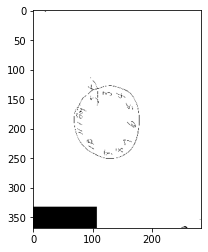

round:  1
shape:  (368, 284)
spid:  10000138
label:  2


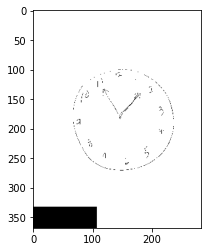

round:  1
shape:  (368, 284)
spid:  10000140
label:  2


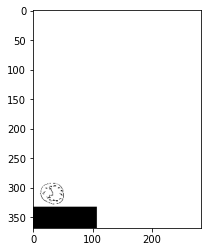

round:  1
shape:  (368, 284)
spid:  10000145
label:  2


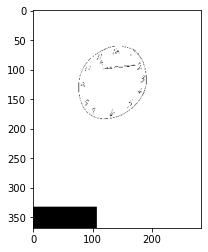

round:  1
shape:  (368, 284)
spid:  10000146
label:  2


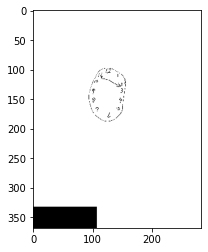

round:  1
shape:  (368, 284)
spid:  10000147
label:  2


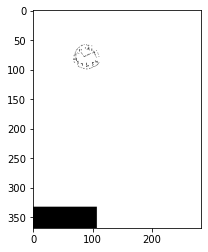

round:  1
shape:  (368, 284)
spid:  10000149
label:  2


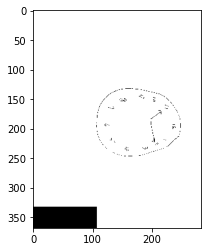

round:  1
shape:  (368, 284)
spid:  10000150
label:  2


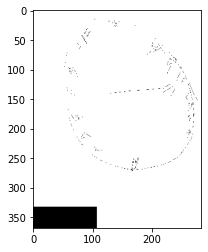

round:  1
shape:  (368, 284)
spid:  10000153
label:  2


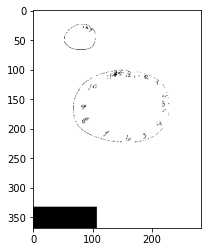

round:  1
shape:  (368, 284)
spid:  10000154
label:  2


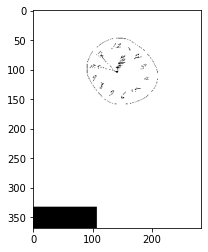

round:  1
shape:  (368, 284)
spid:  10000155
label:  2


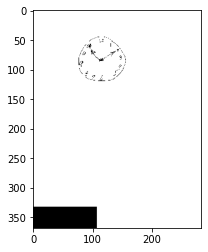

round:  1
shape:  (368, 284)
spid:  10000156
label:  2


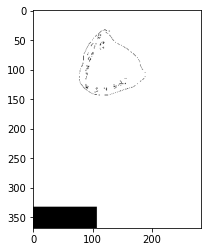

round:  1
shape:  (368, 284)
spid:  10000158
label:  2


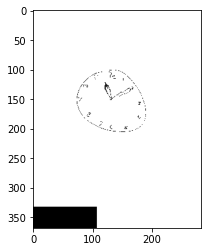

round:  1
shape:  (368, 284)
spid:  10000159
label:  2


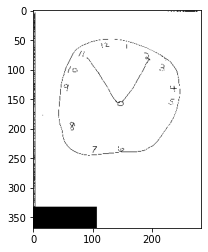

round:  1
shape:  (368, 284)
spid:  10000161
label:  2


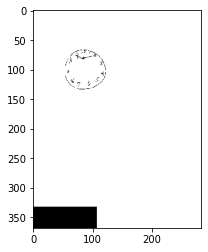

round:  1
shape:  (368, 284)
spid:  10000166
label:  1


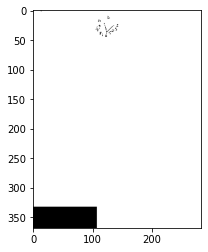

round:  1
shape:  (368, 284)
spid:  10000171
label:  2


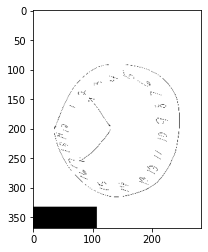

round:  1
shape:  (368, 284)
spid:  10000174
label:  2


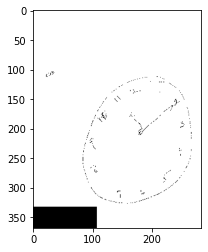

round:  1
shape:  (368, 284)
spid:  10000175
label:  2


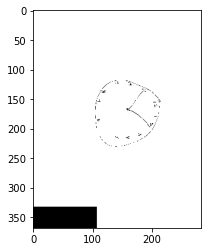

In [22]:
x, y = get_images_test(dictionary)

In [ ]:
# split into train and val
